In [32]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

#plt.style.use('ggplot')

In [7]:
denver_raw = pd.read_csv('../data/i-25-denver, colorado, usa-air-quality.csv')

In [8]:
denver_raw.head(-1)

,date,pm25,pm10,o3,no2,so2,co
0,2020/4/2,22,4,10,4,,1
1,2020/4/3,16,13,15,6,,1
2,2020/4/4,35,10,15,5,,1
3,2020/4/5,24,8,17,6,,2
4,2020/4/6,20,,,,,
...,...,...,...,...,...,...,...
1784,2019/7/7,,,21,,,
1785,2019/1/8,,,15,,1,
1786,2019/3/15,,,17,,,
1787,2018/12/2,,,12,7,,2


In [9]:
denver_raw.describe()

,date,pm25,pm10,o3,no2,so2,co
count,1790,1790,1790,1790,1790,1790,1790
unique,1790,94,68,31,27,4,17
top,2018/10/22,25,21,,10,,3
freq,1,61,88,1120,204,1740,591


In [10]:
denver_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 7 columns):
date     1790 non-null object
 pm25    1790 non-null object
 pm10    1790 non-null object
 o3      1790 non-null object
 no2     1790 non-null object
 so2     1790 non-null object
 co      1790 non-null object
dtypes: object(7)
memory usage: 98.0+ KB


In [11]:
denver_raw[' pm25']

0        22
1        16
2        35
3        24
4        20
       ... 
1785       
1786       
1787       
1788       
1789       
Name:  pm25, Length: 1790, dtype: object

In [12]:
denver_raw['date']= pd.to_datetime(denver_raw['date'])

In [13]:
type(denver_raw['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
denver_raw['date'].min()

Timestamp('2014-09-01 00:00:00')

In [15]:
denver_raw['date'].max()

Timestamp('2020-04-06 00:00:00')

In [16]:
denver_sorted = denver_raw.sort_values('date')

In [17]:
(denver_sorted[' pm25'].max())

' 99'

In [18]:
type(denver_sorted[' pm25'][0])

str

In [19]:
denver_sorted.head()

,date,pm25,pm10,o3,no2,so2,co
1781,2014-09-01,,15,,6,,2
1737,2014-09-02,31,26,,10,,4
1738,2014-09-03,35,27,,12,,4
1739,2014-09-04,31,39,,11,,3
1740,2014-09-05,40,,,8,,4


In [20]:
denver_nan = denver_sorted.replace(" ", np.NaN)

In [21]:
denver_nan.head(100)

,date,pm25,pm10,o3,no2,so2,co
1781,2014-09-01,NaN,15,NaN,6,NaN,2
1737,2014-09-02,31,26,NaN,10,NaN,4
1738,2014-09-03,35,27,NaN,12,NaN,4
1739,2014-09-04,31,39,NaN,11,NaN,3
1740,2014-09-05,40,NaN,NaN,8,NaN,4
...,...,...,...,...,...,...,...
1712,2014-12-05,73,38,NaN,17,NaN,6
1713,2014-12-06,45,42,NaN,16,NaN,10
1714,2014-12-07,63,22,NaN,15,NaN,7
1715,2014-12-08,36,59,NaN,21,NaN,12


In [22]:
denver_nan['pm25'] = pd.to_numeric(denver_nan[' pm25'])

In [23]:
denver_nan['pm10'] = pd.to_numeric(denver_nan[' pm10'])

In [24]:
denver_nan['o3'] = pd.to_numeric(denver_nan[' o3'])

In [25]:
denver_nan['no2'] = pd.to_numeric(denver_nan[' no2'])

In [26]:
denver_nan['so2'] = pd.to_numeric(denver_nan[' so2'])

In [27]:
denver_nan['co'] = pd.to_numeric(denver_nan[' co'])

In [28]:
denver_clean = denver_nan.drop(' pm25', axis = 1).drop(' pm10', axis = 1).drop(' o3', axis = 1).drop(' no2', axis = 1).drop(' so2', axis = 1).drop(' co', axis = 1)

In [29]:
denver_clean.head()

,date,pm25,pm10,o3,no2,so2,co
1781,2014-09-01,NaN,15.0,NaN,6.0,NaN,2.0
1737,2014-09-02,31.0,26.0,NaN,10.0,NaN,4.0
1738,2014-09-03,35.0,27.0,NaN,12.0,NaN,4.0
1739,2014-09-04,31.0,39.0,NaN,11.0,NaN,3.0
1740,2014-09-05,40.0,NaN,NaN,8.0,NaN,4.0


In [30]:
denver_clean.head(-5)

,date,pm25,pm10,o3,no2,so2,co
1781,2014-09-01,NaN,15.0,NaN,6.0,NaN,2.0
1737,2014-09-02,31.0,26.0,NaN,10.0,NaN,4.0
1738,2014-09-03,35.0,27.0,NaN,12.0,NaN,4.0
1739,2014-09-04,31.0,39.0,NaN,11.0,NaN,3.0
1740,2014-09-05,40.0,NaN,NaN,8.0,NaN,4.0
...,...,...,...,...,...,...,...
31,2020-03-28,34.0,11.0,18.0,4.0,NaN,1.0
32,2020-03-29,16.0,4.0,17.0,5.0,NaN,1.0
33,2020-03-30,11.0,16.0,16.0,8.0,NaN,2.0
34,2020-03-31,21.0,23.0,18.0,7.0,NaN,1.0


/Users/taylorbritt/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


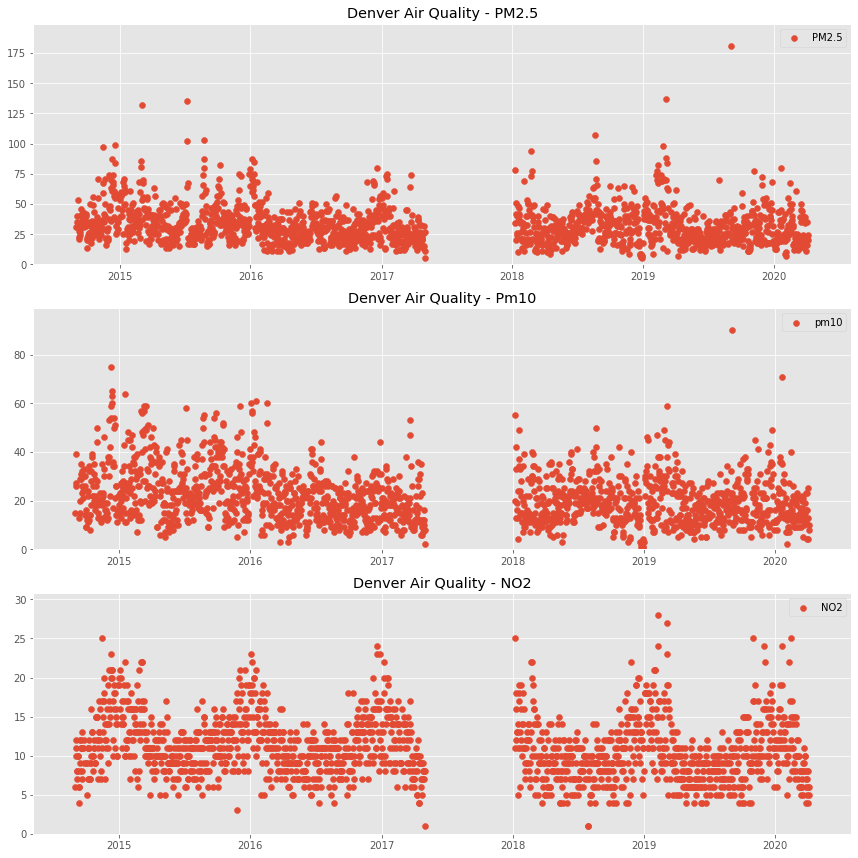

In [31]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(3,1,1)
ax.scatter(denver_clean['date'], denver_clean['pm25'], label = "PM2.5" )
ax.set_title('Denver Air Quality - PM2.5')
ax.set_ylim(0, (denver_clean['pm25'].max()*1.1))
ax.legend(loc='best')
fig.tight_layout(pad=1)
ax = fig.add_subplot(3,1,2)
ax.scatter(denver_clean['date'], denver_clean['pm10'], label = "pm10" )
ax.set_title('Denver Air Quality - Pm10')
ax.set_ylim(0, (denver_clean['pm10'].max()*1.1))
ax.legend(loc='best')
fig.tight_layout(pad=1)
ax = fig.add_subplot(3,1,3)
ax.scatter(denver_clean['date'], denver_clean['no2'], label = "NO2" )
ax.set_title('Denver Air Quality - NO2')
ax.set_ylim(0, (denver_clean['no2'].max()*1.1))
ax.legend(loc='best')
fig.tight_layout(pad=1)

In [27]:
denverq1_16 = denver_clean[denver_clean['date'] > datetime.datetime(2016, 1, 1)]

In [28]:
denverq1_16 = denverq1_16[denverq1_16['date'] < datetime.datetime(2016, 4, 1)]

In [29]:
denverq1_16.head(-1)

,date,pm25,pm10,o3,no2,so2,co
1778,2016-01-03,NaN,34.0,NaN,17.0,NaN,10.0
1376,2016-01-04,60.0,60.0,NaN,23.0,NaN,13.0
1196,2016-01-05,87.0,56.0,NaN,22.0,NaN,14.0
1197,2016-01-06,71.0,57.0,NaN,19.0,NaN,9.0
1198,2016-01-07,62.0,36.0,NaN,18.0,NaN,7.0
...,...,...,...,...,...,...,...
1277,2016-03-26,27.0,12.0,NaN,7.0,NaN,3.0
1278,2016-03-27,38.0,8.0,NaN,8.0,NaN,3.0
1279,2016-03-28,16.0,31.0,NaN,16.0,NaN,5.0
1280,2016-03-29,38.0,32.0,NaN,12.0,NaN,4.0


In [30]:
len(denverq1_16)

89

NameError: name 'denver_clean' is not defined

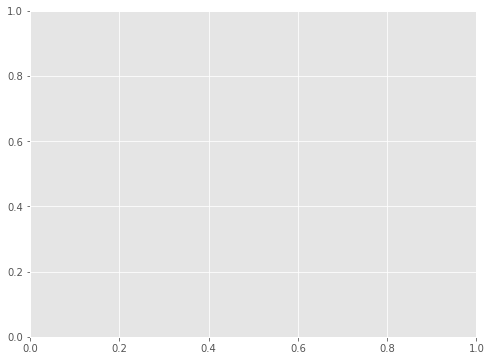

In [5]:
years = [2016, 2017, 2018, 2019, 2020]

fig, ax = plt.subplots(figsize=(8,6))
for year in years:
    denverq = denver_clean[denver_clean['date'] > datetime.datetime(year, 1, 1)]
    denverq = denverq[denverq['date'] < datetime.datetime(year, 4, 1)]
    x = np.arange(0, len(denverq), 1)
    y = denverq['no2']
    if year == 2020:
        ax.plot(x, y, linewidth = 3, label = str(year))
    else:
        ax.plot(x, y, alpha = .5, label = str(year))
    
ax.legend(loc='best')
    


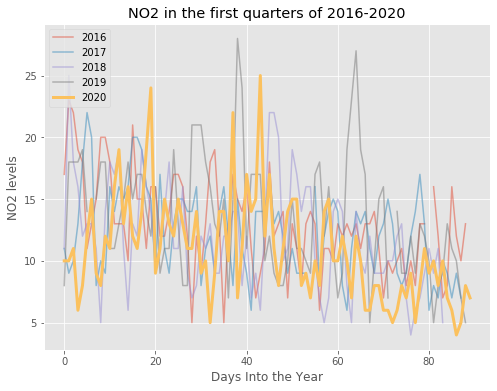

In [35]:
years = [2016, 2017, 2018, 2019, 2020]
cols = {'pm25': 'PM25', 'pm10': 'PM10', 'o3' : 'O3', 'no2':'NO2', 'so2':'SO2', 'co':'CO'}

fig, ax = plt.subplots(figsize=(8,6))
for year in years:
    denverq = denver_clean[denver_clean['date'] > datetime.datetime(year, 1, 1)]
    denverq = denverq[denverq['date'] < datetime.datetime(year, 4, 1)]
    x = np.arange(0, len(denverq), 1)
    y = denverq['no2']
    if year == 2020:
        ax.plot(x, y, linewidth = 3, label = str(year))
    else:
        ax.plot(x, y, alpha = .5, label = str(year))
ax.set_title('NO2 in the first quarters of 2016-2020')
#ax.axvline(x = 83, ls='--')
ax.set_ylabel('NO2 levels')
ax.set_xlabel('Days Into the Year')
ax.legend(loc='upper left')


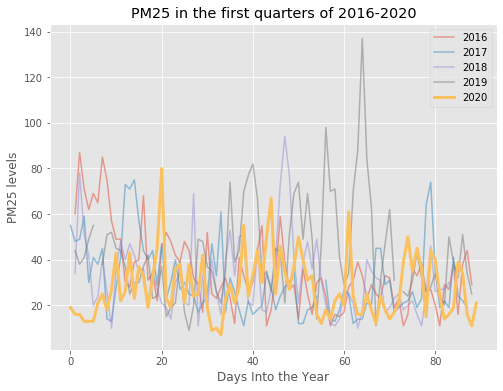

In [34]:
years = [2016, 2017, 2018, 2019, 2020]
cols = {'pm25': 'PM25', 'pm10': 'PM10', 'o3' : 'O3', 'no2':'NO2', 'so2':'SO2', 'co':'CO'}

fig, ax = plt.subplots(figsize=(8,6))
for year in years:
    denverq = denver_clean[denver_clean['date'] > datetime.datetime(year, 1, 1)]
    denverq = denverq[denverq['date'] < datetime.datetime(year, 4, 1)]
    x = np.arange(0, len(denverq), 1)
    y = denverq['pm25']
    if year == 2020:
        ax.plot(x, y, linewidth = 3, label = str(year))
    else:
        ax.plot(x, y, alpha = .5, label = str(year))
ax.set_title('PM25 in the first quarters of 2016-2020')
# ax.axvline(x = 83, ls='--')
ax.set_ylabel('PM25 levels')
ax.set_xlabel('Days Into the Year')
ax.legend(loc='best')

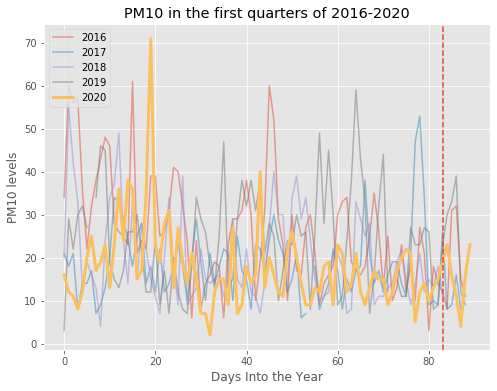

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
for year in years:
    denverq = denver_clean[denver_clean['date'] > datetime.datetime(year, 1, 1)]
    denverq = denverq[denverq['date'] < datetime.datetime(year, 4, 1)]
    x = np.arange(0, len(denverq), 1)
    y = denverq['pm10']
    if year == 2020:
        ax.plot(x, y, linewidth = 3, label = str(year))
    else:
        ax.plot(x, y, alpha = .5, label = str(year))
ax.set_title('PM10 in the first quarters of 2016-2020')
ax.set_ylabel('PM10 levels')
ax.set_xlabel('Days Into the Year')
ax.axvline(x = 83, ls='--')
ax.legend(loc='upper left')

In [35]:
col = np.arange(0,91).reshape(-1,1)

In [36]:
row = np.arange(0, 10)

In [37]:
mat = col + row

In [38]:
mat

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
       [14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
       [17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
       [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
       [19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
       [20, 21, 22, 

In [39]:
np.mean(denverq1_16['no2'].iloc[1:9])

17.625

In [40]:
denverq1_16_long = denver_clean[denver_clean['date'] > datetime.datetime(year-1, 12, 27)]
denverq1_16_long = denverq1_16_long[denverq1_16_long['date'] < datetime.datetime(year, 4, 6)]

In [41]:
windows = []

for i in range(0, len(denverq1_16_long) -10):
    index = range(mat[i][0], mat[i][9])
    windows.append(np.nanmean(denverq1_16_long['no2'].iloc[index]))

In [42]:
len(windows)

89

In [43]:
len(denverq1_16)

89

len(windows)

In [181]:
def moving_day_average(df, col_name, day_range = 9):
    col = np.arange(0, len(df) - day_range +1).reshape(-1,1)
    row = np.arange(0, day_range)
    mat = col + row
    col_array = df[col_name].to_numpy()
    indexed = col_array[mat]
    return np.nanmean(indexed, axis =1)

In [167]:
len(denverq1_16)

89

In [182]:
x = moving_day_average(denverq1_16, 'no2')

In [183]:
print(x)

[17.55555556 17.88888889 17.33333333 16.33333333 15.66666667 15.11111111
 15.         15.88888889 15.88888889 15.33333333 14.33333333 14.11111111
 14.44444444 14.33333333 14.22222222 14.66666667 14.22222222 14.44444444
 14.55555556 14.66666667 13.44444444 13.         12.66666667 12.77777778
 13.22222222 13.44444444 13.         11.77777778 11.88888889 13.22222222
 13.55555556 14.11111111 14.44444444 13.66666667 12.33333333 11.88888889
 12.55555556 13.11111111 12.55555556 12.33333333 12.33333333 11.33333333
 11.55555556 12.         11.88888889 12.11111111 11.66666667 11.77777778
 11.         10.66666667 11.11111111 10.77777778 11.         11.44444444
 11.44444444 11.22222222 11.22222222 11.77777778 12.         12.22222222
 12.66666667 12.44444444 11.88888889 11.55555556 11.22222222 10.88888889
 10.88888889 10.33333333 10.          9.33333333  9.55555556 10.22222222
 10.25       11.125      11.375      10.875      10.875      11.625
 12.125      11.75       11.75      ]


In [184]:
len(x)

81

In [58]:
denverq1_16_long['no2']

180      6.0
181     11.0
182      NaN
1767    12.0
65      10.0
        ... 
35       8.0
0        4.0
1        6.0
2        5.0
3        6.0
Name: no2, Length: 99, dtype: float64

range(0, 9)
range(1, 10)
range(2, 11)
range(3, 12)
range(4, 13)
range(5, 14)
range(6, 15)
range(7, 16)
range(8, 17)
range(9, 18)
range(10, 19)
range(11, 20)
range(12, 21)
range(13, 22)
range(14, 23)
range(15, 24)
range(16, 25)
range(17, 26)
range(18, 27)
range(19, 28)
range(20, 29)
range(21, 30)
range(22, 31)
range(23, 32)
range(24, 33)
range(25, 34)
range(26, 35)
range(27, 36)
range(28, 37)
range(29, 38)
range(30, 39)
range(31, 40)
range(32, 41)
range(33, 42)
range(34, 43)
range(35, 44)
range(36, 45)
range(37, 46)
range(38, 47)
range(39, 48)
range(40, 49)
range(41, 50)
range(42, 51)
range(43, 52)
range(44, 53)
range(45, 54)
range(46, 55)
range(47, 56)
range(48, 57)
range(49, 58)
range(50, 59)
range(51, 60)
range(52, 61)
range(53, 62)
range(54, 63)
range(55, 64)
range(56, 65)
range(57, 66)
range(58, 67)
range(59, 68)
range(60, 69)
range(61, 70)
range(62, 71)
range(63, 72)
range(64, 73)
range(65, 74)
range(66, 75)
range(67, 76)
range(68, 77)
range(69, 78)
range(70, 79)
range(71, 80)
ran

ValueError: x, y, and format string must not be None

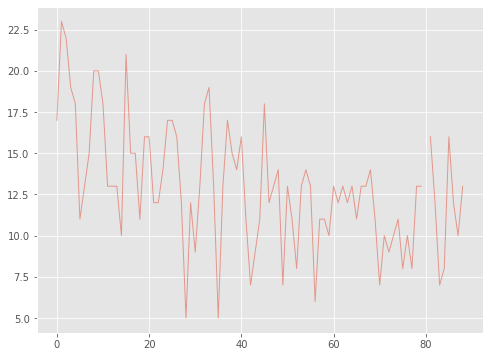

In [46]:
x = np.arange(0, len(denverq1_16), 1)
#     y = denverq['pm10']


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, denverq1_16['no2'], linewidth = 1, alpha = .5, label = 'Daily')
ax.plot(x, moving_day_average(denverq1_16_long, 'no2'), linewidth = 2, alpha = 1, label = "10 day window")
ax.set_title('NO2 in the first quarters of 2016: Daily vs 10 Day Moving Averages')
ax.set_ylabel('NO2 levels')
ax.set_xlabel('Days Into the Year')
ax.axvline(x = 83, ls='--')
ax.legend(loc='upper left')

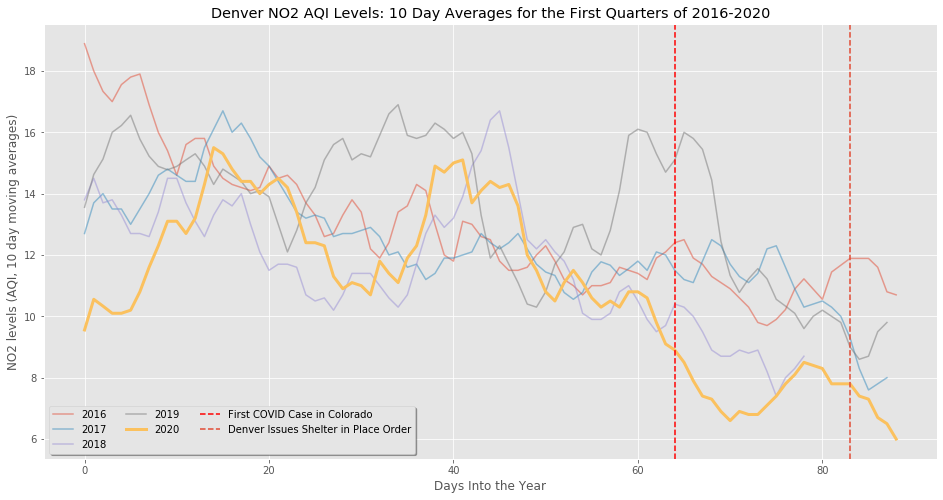

In [93]:
fig, ax = plt.subplots(figsize=(16,8))
for year in years:
    denverq = denver_clean[denver_clean['date'] > datetime.datetime(year-1, 12, 27)]
    denverq = denverq[denverq['date'] < datetime.datetime(year, 4, 5)]
    x = np.arange(0, len(denverq)-9, 1)
    y = moving_day_average(denverq, 'no2')
    if year == 2020:
        ax.plot(x, y, linewidth = 3, label = str(year))
    else:
        ax.plot(x, y, alpha = .5, label = str(year))
ax.set_title('Denver NO2 AQI Levels: 10 Day Averages for the First Quarters of 2016-2020')
ax.axvline(x = 64, ls='--', c='red', label = "First COVID Case in Colorado")

ax.axvline(x = 83, ls='--', label = "Denver Issues Shelter in Place Order")
ax.set_ylabel('NO2 levels (AQI, 10 day moving averages)')
ax.set_xlabel('Days Into the Year')
ax.legend(loc='best', ncol=3, fancybox=True, shadow=True)

In [ ]:
denver_clean['no2'].unique()

In [ ]:
file_picklename_dict = {
'aurora-hills visitor center, northern virginia, usa-air-quality.csv' : 'dc',
'beacon-hill, seattle, washington, usa-air-quality.csv' : 'seattle',
'beijing-air-quality.csv' : 'beijing',
'clinton,-houston, texas-air-quality.csv' : 'houston',
'dallas-hinton, fort worth, dallas, texas-air-quality.csv' : 'dallas',
'gary-iitri,-indiana, usa-air-quality.csv' : 'gary',
'i-25-denver, colorado, usa-air-quality.csv' : 'chicago',
'los-angeles-north main street-air-quality.csv' : 'la',
'madrid-air-quality.csv' : 'madrid',
'milano-pascal città studi, lombardia, italy-air-quality.csv' : 'milan',
'oakland-- west, alameda, california-air-quality.csv' : 'oakland',
'paris-air-quality.csv' : 'paris',
'parque-d.pedro ii, são paulo, brazil-air-quality.csv' : 'saopaulo',
'parque-o\'higgins, chile-air-quality.csv' : 'santiago',
'queens-college, new york, usa-air-quality.csv' : 'nyc',
'wuhan-air-quality (1).csv' : 'wuhan'}  

In [ ]:
file_picklename_dict.keys()

In [ ]:
for filename in file_picklename_dict.keys():
    print(f'The filename is "{filename}" and the picklefile is called "{file_picklename_dict[filename]}"')

In [ ]:
firstyear = 2016
years = np.arange(firstyear, 2021, 1)

In [ ]:
years

In [ ]:
plot_dict = {
    'beijing': ['Beijing', 0, 0],
    'dallas': ['Dallas', 69, 82],
    'denver': ['Denver', 64, 83],
    'houston': ['Houston', 69, 84],
    'la': ['Los Angeles', 26, 83],
    'madrid' : ['Madrid', 31, 73],
    'nyc' : ['New York City', 61, 80],
    'oakland' : ['Oakland', 26, 76],
    'paris' : ['Paris', 24, 77],
    'santiago' : ['Santiago de Chile', 63, 86],
    'saopaulo' : ['São Paulo', 66, 81],
    'seattle' : ['Seattle', 21, 83],
    'wuhan' : ['Wuhan', 0, 0]}

In [ ]:
a, b, c = plot_dict['beijing']